# Reinforcement Learning for Optimal Delivery Route

## 1. Import Agents, Environment and Necessary Libraries

In [10]:
import numpy as np

from dqn import DQNAgent
from environment import DeliveryEnvironment
from q_learning import QLearningAgent
from sarsa import SarsaAgent
from visualize import plot_comparison

## The Training Loop

In [11]:
def train(agent, env, episodes=1000, total_reward=None):
    """
    Trains a reinforcement learning agent in the given environment.
    """
    if isinstance(agent, DQNAgent):
        print("Training DQN Agent...")
        for episode in range(episodes):
            state = env.reset()
            done = False
            total_reward = 0
            while not done:
                action = agent.get_action(state)
                if action is None:
                    break
                next_state, reward, done = env.step(action)
                agent.remember(state, action, reward, next_state, done)
                state = next_state
                total_reward += reward
            agent.replay()
            if (episode + 1) % 50 == 0:
                print(
                    f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward:.2f}, Epsilon: {agent.epsilon:.2f}")

    elif isinstance(agent, QLearningAgent):
        print("Training Q-Learning Agent...")
        for episode in range(episodes):
            state = env.reset()
            done = False
            total_reward = 0
            while not done:
                action = agent.get_action(state)
                if action is None:
                    break
                next_state, reward, done = env.step(action)
                agent.update(state, action, reward, next_state)
                state = next_state
                total_reward += reward
            if (episode + 1) % 50 == 0:
                print(
                    f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward:.2f}, Epsilon: {agent.epsilon:.2f}")

    elif isinstance(agent, SarsaAgent):
        print("Training SARSA Agent...")
        for episode in range(episodes):
            state = env.reset()
            done = False
            total_reward = 0
            action = agent.get_action(state)
            while not done:
                if action is None:
                    break
                next_state, reward, done = env.step(action)
                next_action = agent.get_action(next_state)
                agent.update(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action
                total_reward += reward
            if (episode + 1) % 50 == 0:
                print(
                    f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward:.2f}, Epsilon: {agent.epsilon:.2f}")
    else:
        raise TypeError("Unsupported agent type")


## Evaluation Function

In [12]:
def evaluate(agent, env, episodes=100):
    """
    Evaluates a trained agent's performance.
    """
    total_rewards = []
    total_times = []
    total_distances = []

    original_epsilon = getattr(agent, 'epsilon', 0)
    if hasattr(agent, 'epsilon'):
        agent.epsilon = 0

    for _ in range(episodes):
        state = env.reset()
        done = False
        episode_reward = 0
        episode_time = 0
        episode_distance = 0

        while not done:
            action = agent.get_action(state)
            if action is None:
                break

            start_pos = env.current_pos
            next_state, reward, done = env.step(action)
            end_pos = env.current_pos

            episode_reward += reward
            episode_time += 1
            episode_distance += np.linalg.norm(start_pos - end_pos)
            state = next_state

        total_rewards.append(episode_reward)
        total_times.append(episode_time)
        total_distances.append(episode_distance)

    if hasattr(agent, 'epsilon'):
        agent.epsilon = original_epsilon

    return {
        "avg_reward": np.mean(total_rewards),
        "avg_time": np.mean(total_times),
        "avg_distance": np.mean(total_distances)
    }

Configure Environment and Agents

Training Q-Learning Agent...
Episode 50/2000, Total Reward: -41.01, Epsilon: 0.10
Episode 100/2000, Total Reward: -46.62, Epsilon: 0.10
Episode 150/2000, Total Reward: -39.36, Epsilon: 0.10
Episode 200/2000, Total Reward: -29.40, Epsilon: 0.10
Episode 250/2000, Total Reward: -34.81, Epsilon: 0.10
Episode 300/2000, Total Reward: -33.20, Epsilon: 0.10
Episode 350/2000, Total Reward: -45.35, Epsilon: 0.10
Episode 400/2000, Total Reward: -40.64, Epsilon: 0.10
Episode 450/2000, Total Reward: -45.53, Epsilon: 0.10
Episode 500/2000, Total Reward: -39.47, Epsilon: 0.10
Episode 550/2000, Total Reward: -40.01, Epsilon: 0.10
Episode 600/2000, Total Reward: -45.59, Epsilon: 0.10
Episode 650/2000, Total Reward: -44.58, Epsilon: 0.10
Episode 700/2000, Total Reward: -46.98, Epsilon: 0.10
Episode 750/2000, Total Reward: -40.68, Epsilon: 0.10
Episode 800/2000, Total Reward: -42.59, Epsilon: 0.10
Episode 850/2000, Total Reward: -45.58, Epsilon: 0.10
Episode 900/2000, Total Reward: -33.93, Epsilon: 0.10


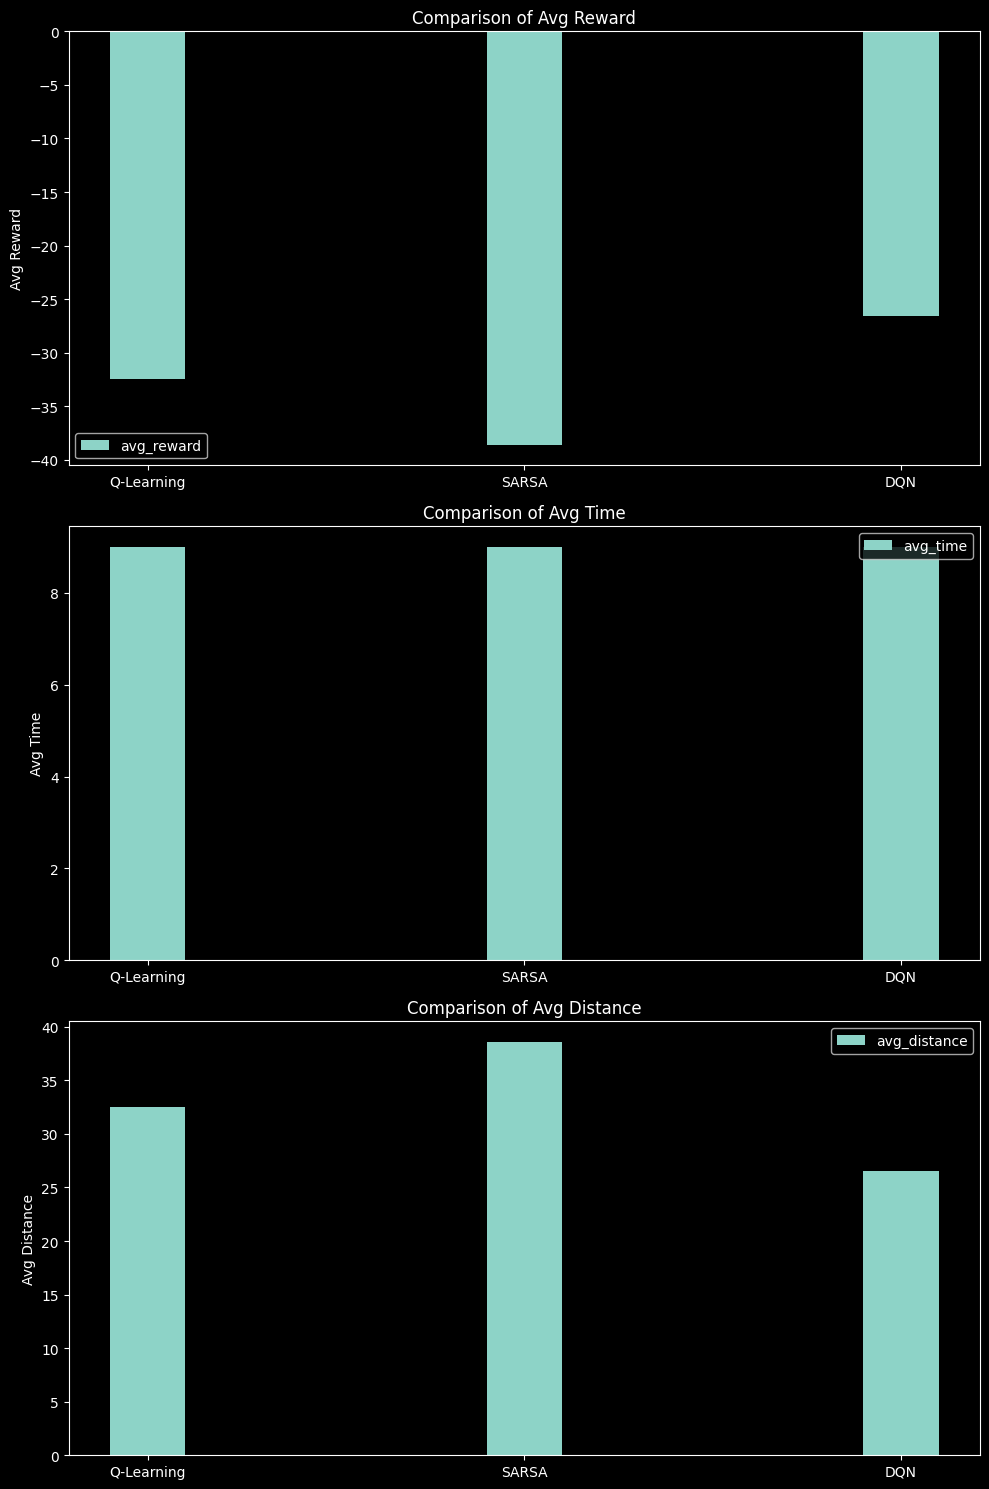

In [13]:
env = DeliveryEnvironment(num_locations=10, grid_size=10)

# --- Q-Learning ---
q_agent = QLearningAgent(env, alpha=0.1, gamma=0.9, epsilon=0.1)
train(q_agent, env, episodes=2000)
q_results = evaluate(q_agent, env)
print("Q-Learning training complete.")

# --- SARSA ---
sarsa_agent = SarsaAgent(env, alpha=0.1, gamma=0.9, epsilon=0.1)
train(sarsa_agent, env, episodes=2000)
sarsa_results = evaluate(sarsa_agent, env)
print("SARSA training complete.")

# --- DQN ---
dqn_agent = DQNAgent(env)
train(dqn_agent, env, episodes=500)
dqn_results = evaluate(dqn_agent, env)
print("DQN training complete.")

# --- Comparison ---
all_results = {
    "Q-Learning": q_results,
    "SARSA": sarsa_results,
    "DQN": dqn_results
}

print("\n--- Algorithm Comparison ---")
print(f"Q-Learning: {q_results}")
print(f"SARSA:      {sarsa_results}")
print(f"DQN:        {dqn_results}")
print("--------------------------")

plot_comparison(all_results)